<a href="https://colab.research.google.com/github/EnlunaT/2023HFU-Project/blob/main/(%E5%A4%A7%E7%9C%BE)%E5%AE%8C%E6%95%B4%E9%9B%BB%E5%BD%B1%E8%B3%87%E6%96%99%E7%88%AC%E8%9F%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#工具
from re import U
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from collections import Counter
#抓取資料
url = "https://www.imdb.com/list/ls093350982/"
url_2 = "https://www.imdb.com/list/ls093350982/?page=2"
url_3 = "https://www.imdb.com/list/ls093350982/?page=3"
url_4 = "https://www.imdb.com/list/ls093350982/?page=4"
url_5 = "https://www.imdb.com/list/ls093350982/?page=5"
url_6 = "https://www.imdb.com/list/ls093350982/?page=6"
all_url = [url,url_2,url_3,url_4,url_5,url_6]
header = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'}
#自創變數
Year = []
URL = []
Title = []
Genre= []
Duration = []
Rating = []
Vote = []
bigTitle = []
bigRating = []
bigGenre= []
bigVote= []
popularbigGenre= []
popularbigTitle = []

w = 0
while w < 6:
  r = requests.get(all_url[w])
  w=w+1
  soup = BeautifulSoup(r.content, 'html.parser')
#找VOTE
  p_tags = soup.find_all('p', class_='text-muted text-small')
  for p_tag in p_tags:
    for span_tag in p_tag.find_all('span', {'name': 'nv'}):
      data_value = span_tag.get('data-value')
      Vote.append(float(data_value))
      break
# 找URL、TITLE、YEAR
  h3_elements = soup.find_all('h3', {'class': 'lister-item-header'})
  for t in h3_elements:
    # print(t.a['href'])
    URL.append(t.a['href'])
    # print(t.a.text)
    Title.append(t.a.text)
    for year in t('span', {'class': 'lister-item-year text-muted unbold'}):
      Year.append(year.text)
# 找GENRE、DURATION
  p_elements = soup.find_all('p', {'class': 'text-muted text-small'})
  for g in p_elements:
    for genre in g('span', {'class': 'genre'}):
      Genre.append(genre.text)
    for duration in g('span', {'class': 'runtime'}):
      Duration.append(duration.text)
# 找RATING
  div_elements = soup.find_all('div', {'class': 'ipl-rating-star small'})
  for b in div_elements:
    rating = b.find('span', {'class': 'ipl-rating-star__rating'})
    Rating.append(float(rating.text))
# 統一LIST
  combined_list = list(zip(Title, Vote, Rating))
  print(len(combined_list))

100
200
300
400
500
555


查看Rating分布情形
maxRating= 8.2
minRating= 2.8


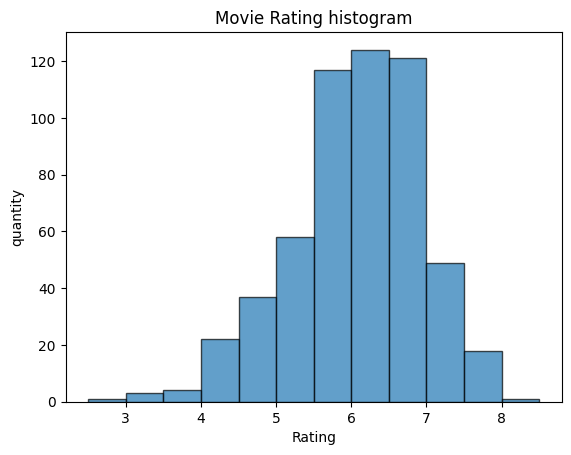

<Figure size 640x480 with 0 Axes>

In [ ]:
print("查看Rating分布情形")
print("maxRating=",max(Rating))
print("minRating=",min(Rating))

bins1=[2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5]
plt.hist(Rating, bins=bins1, edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('quantity')
plt.title('Movie Rating histogram')
# print(smallGenre)
display(plt.gcf())
plt.clf()

投票數量分布區間
minVote= 102.0
maxVote= 587337.0


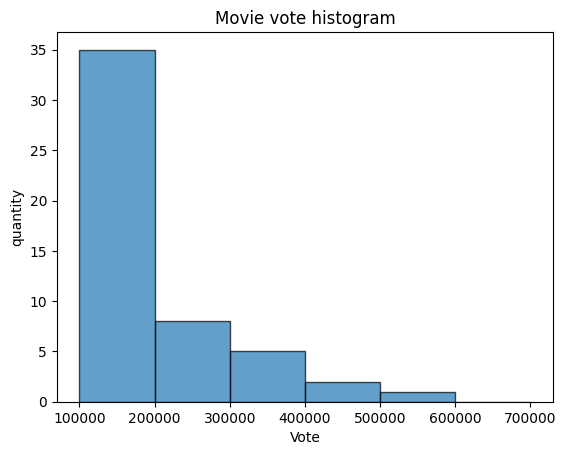

sum of Vote= 22477192.0


<Figure size 640x480 with 0 Axes>

In [ ]:
print("投票數量分布區間")
print("minVote=",min(Vote))
print("maxVote=",max(Vote))
bins2=[100000,200000,300000,400000,500000,600000,700000]
plt.hist(Vote, bins=bins2, edgecolor='black', alpha=0.7)
plt.xlabel('Vote')
plt.ylabel('quantity')
plt.title('Movie vote histogram')
display(plt.gcf())
plt.clf()

print("sum of Vote=",sum(Vote))

In [ ]:
sumBigVote = 0
print("判定多少數量稱為大眾")
i = 0
while i < 555:
  if Vote[i] > 100000:
    sumBigVote = sumBigVote + Vote[i]
  i = i+1
print("sumBigVote=",sumBigVote)
print("Vote大於100000比例為=",sumBigVote/sum(Vote))

判定多少數量稱為大眾
sumBigVote= 10070117.0
Vote大於20000比例為= 0.44801490328507226


In [ ]:
print("將大眾電影取出")
i = 0
while i < 555:
  if Vote[i] > 100000:
    bigTitle.append(Title[i])
    bigRating.append(Rating[i])
    bigGenre.append(Genre[i])
    bigVote.append(Vote[i])
  i=i+1

將大眾電影取出


畫出大眾電影的評分分布圖
number of bigmovie= 51
min of bigRating= 5.5
max of bigRating= 8.2


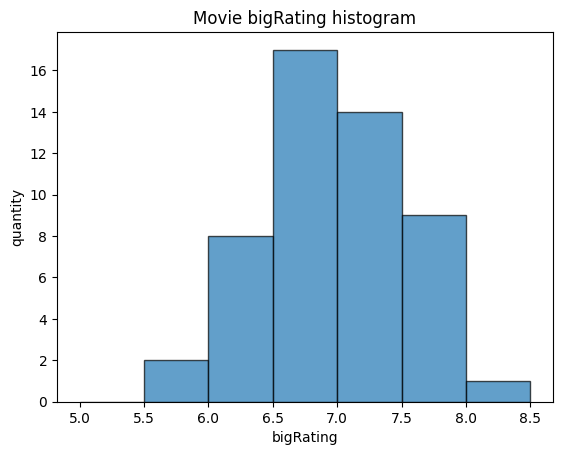

<Figure size 640x480 with 0 Axes>

In [ ]:
print("畫出大眾電影的評分分布圖")
print("number of bigmovie=",len(bigRating))
print("min of bigRating=",min(bigRating))
print("max of bigRating=",max(bigRating))
bins1=[5,5.5,6,6.5,7,7.5,8,8.5]
plt.hist(bigRating, bins=bins1, edgecolor='black', alpha=0.7)
plt.xlabel('bigRating')
plt.ylabel('quantity')
plt.title('Movie bigRating histogram')
# print(smallGenre)
display(plt.gcf())
plt.clf()

In [ ]:
print("將一個標準差以上的定義為大眾的優質電影")

big_movie_number = len(bigRating)
bigRatingAverage = sum(bigRating)/big_movie_number
print("平均數:",bigRatingAverage)
# 使用numpy的std函數計算標準差
standard_deviation = np.std(bigRating)
# 打印結果
print("標準差:",standard_deviation)
i = 0
while i < big_movie_number:
  if bigRating[i]>bigRatingAverage+standard_deviation:
    popularbigGenre.append(bigGenre[i])
    popularbigTitle.append(bigTitle[i])
  i = i+1
print("優質小眾電影數量:",len(popularbigTitle))

將一個標準差以上的定義為大眾的優質電影
平均數: 6.913725490196081
標準差: 0.5694922430028753
優質小眾電影數量: 10


畫出大眾優質電影中喜好類型分布


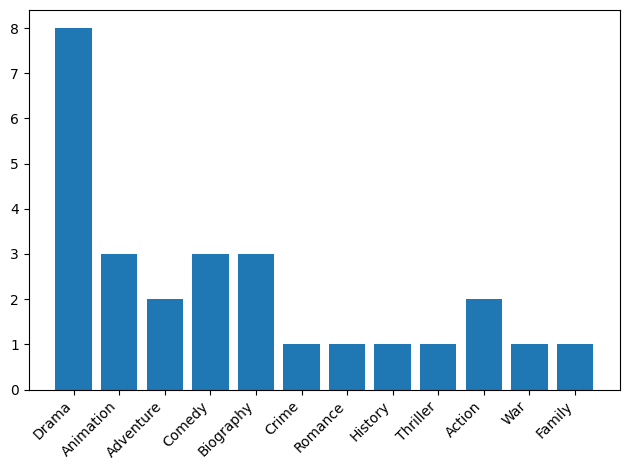

<Figure size 640x480 with 0 Axes>

In [ ]:
print("畫出大眾優質電影中喜好類型分布")
cleaned_list = [word.replace(" ", "") for word in popularbigGenre]
cleaned_list = [word.replace("\n", "") for word in cleaned_list]
split_list = [word for item in cleaned_list for word in item.split(',')]

# 使用Counter計算列表中每個元素的數量
word_counts = Counter(split_list)

# 取得字串和對應的出現次數
words = list(word_counts.keys())
counts = list(word_counts.values())
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
display(plt.gcf())
plt.clf()
plt.show()

In [ ]:
print("找出符合Drama,Animation,Comedy,Biography的電影")
target_string_1 = "Drama"
target_string_2 = "Animation"
target_string_3 = "Comedy"
target_string_4 = "Biography的電影"

# 使用enumerate和列表生成式進行過濾，同時獲取索引
filtered_list_with_indices = [(index, word)
for index, word in enumerate(popularbigGenre)
if all(target in word for target in [target_string_1])]
print("共有",len(filtered_list_with_indices),"部電影符合")
# 打印結果
for index, word in filtered_list_with_indices:
    print("movie:",popularbigTitle[index])
    print("rating:",bigRating[index])
    print(f"Index: {index}, Word: {word}")

找出符合Drama,Animation,Comedy,Biography的電影
共有 8 部電影符合
movie: 羅馬
rating: 7.3
Index: 0, Word: 
Drama            
movie: 愛爾蘭人
rating: 6.5
Index: 2, Word: 
Biography, Crime, Drama            
movie: 婚姻故事
rating: 6.3
Index: 3, Word: 
Drama, Romance            
movie: 教宗的承繼
rating: 6.3
Index: 4, Word: 
Biography, Comedy, Drama            
movie: 芝加哥七人案：驚世審判
rating: 5.5
Index: 5, Word: 
Drama, History, Thriller            
movie: 倒數時刻
rating: 6.8
Index: 7, Word: 
Biography, Comedy, Drama            
movie: 西線無戰事
rating: 7.0
Index: 8, Word: 
Action, Drama, War            
movie: 吉勒摩．戴托羅之皮諾丘
rating: 7.2
Index: 9, Word: 
Animation, Drama, Family            
